In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
tit=pd.read_csv('titanic_train-Copy1.csv')
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

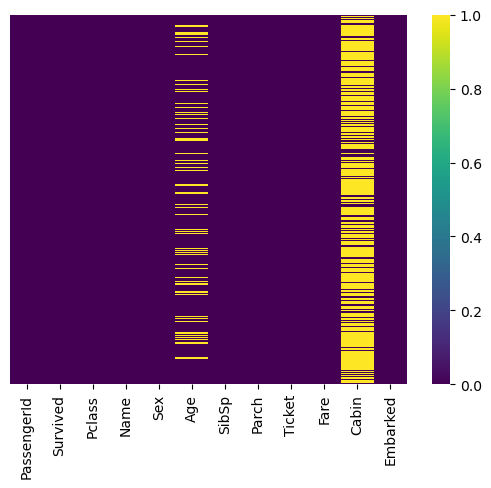

In [3]:
sns.heatmap(tit.isnull(), yticklabels=False,cmap='viridis')

In [4]:
tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
tit[tit['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## capturing the NAN values into another variable

In [6]:
tit['cabins']=np.where(tit['Cabin'].isnull(),1,0)


In [7]:
tit['Cabin'].isnull().mean()

0.7710437710437711

In [8]:
tit.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabins'],
      dtype='object')

In [9]:
tit.cabins

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: cabins, Length: 891, dtype: int32

<Axes: xlabel='Survived', ylabel='count'>

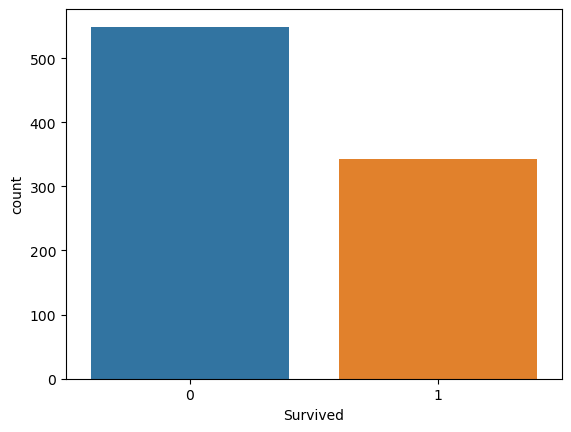

In [36]:
sns.countplot(x='Survived',data=tit)

<Axes: ylabel='Frequency'>

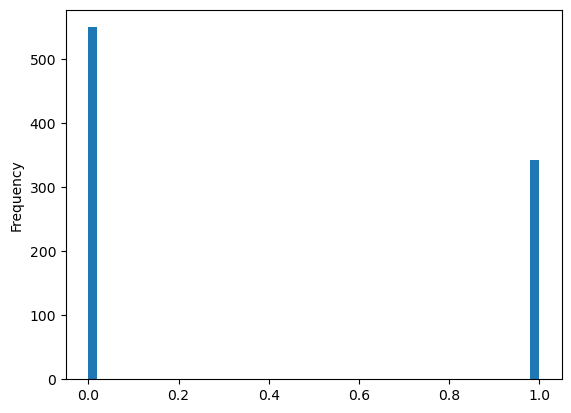

In [40]:
tit['Survived'].plot.hist(bins=50)

In [10]:
tit.groupby(['Survived'])['cabins'].mean()

Survived
0    0.876138
1    0.602339
Name: cabins, dtype: float64

In [11]:
tit['Age'].isnull().mean()

0.19865319865319866

## techniques to handle the missing values

## 1) mean,median,mode imputation
we apply this when we have a type "missing completely at random(MCAR)
we will apply this by replacing the NaN values with the most frequent occurence of the variable

## median is called sorting the data and taking the average of to find the middle value

In [12]:
df=pd.read_csv('titanic_train-Copy1.csv',usecols=['Survived','Age','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [14]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

 ## applying median imputation

In [15]:
def median_imp(dataset,column,median):
    df[column+"_median"]=df[column].fillna(median)

In [16]:
median=df.Age.median()
median

28.0

In [41]:
median_imp(df,'Age',median)
df.head(10)

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,28.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


In [18]:
df['Age'].std()

14.526497332334044

In [19]:
df['Age_median'].std()

13.019696550973194

## checking in viadualized form how much it effects  on actual value and replaced nan values with median

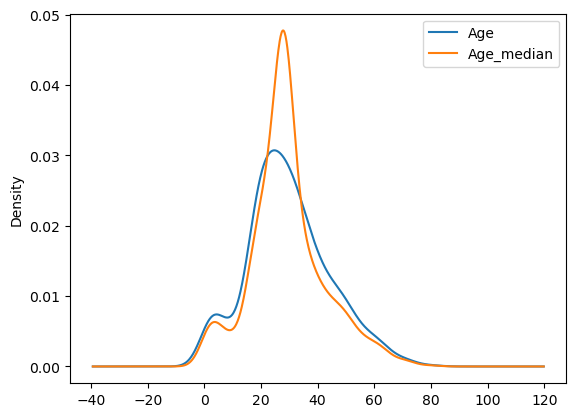

In [43]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
df.Age.plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax)
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


## advantages:
1) easy to implement.
2) faster way to obtain the whole/complete dataset

## Disadvantages:
1) distortion on the original variance.
